In [135]:
# Import needed libraries
import sys
sys.path.append(r'e:\Data science\Titanic dataset\notebooks')

from auto_imports import *
# this is a py have all needed functions:
"""
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
"""

"\n# Import needed libraries\nimport pandas as pd\nimport numpy as np\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport warnings\n\nwarnings.filterwarnings('ignore')\n"

In [136]:

train_df = pd.read_csv(r'E:\Data science\Titanic dataset\data\Raw Data\train.csv')
test_df = pd.read_csv(r'E:\Data science\Titanic dataset\data\Raw Data\test.csv')
train_df['ind'] = 'train'
test_df['ind'] = 'test'

In [137]:
# Combaining them to make data cleaning and feature engineering on them
df = pd.concat([train_df,test_df])
df.reset_index(drop=True , inplace=True)
df.head()
df.to_csv('E:\Data science\Titanic dataset\data\Processed data\Data Analysis\Combined_data.csv' , index=False)

#### EDA

In [138]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [139]:
#checking duplicates in passengers id
df['PassengerId'].duplicated().value_counts()

PassengerId
False    1309
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

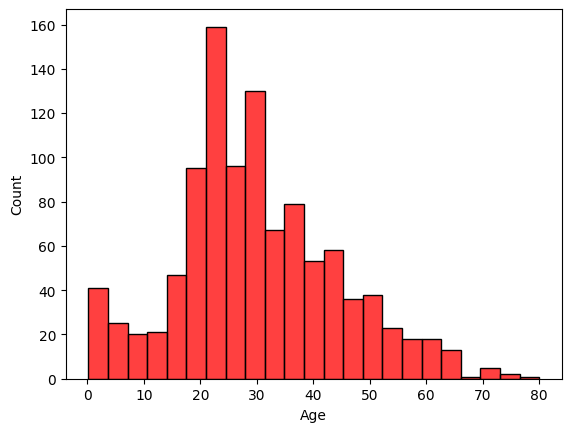

In [140]:
#plot Age Age distribution distribution
sns.histplot(df['Age'], color='red')

- Age distribution is normal, so that's mean (mean = mode = median) and the most common ages are between 20 - 40 years old abroad the titanic


Text(0.5, 0, 'sex')

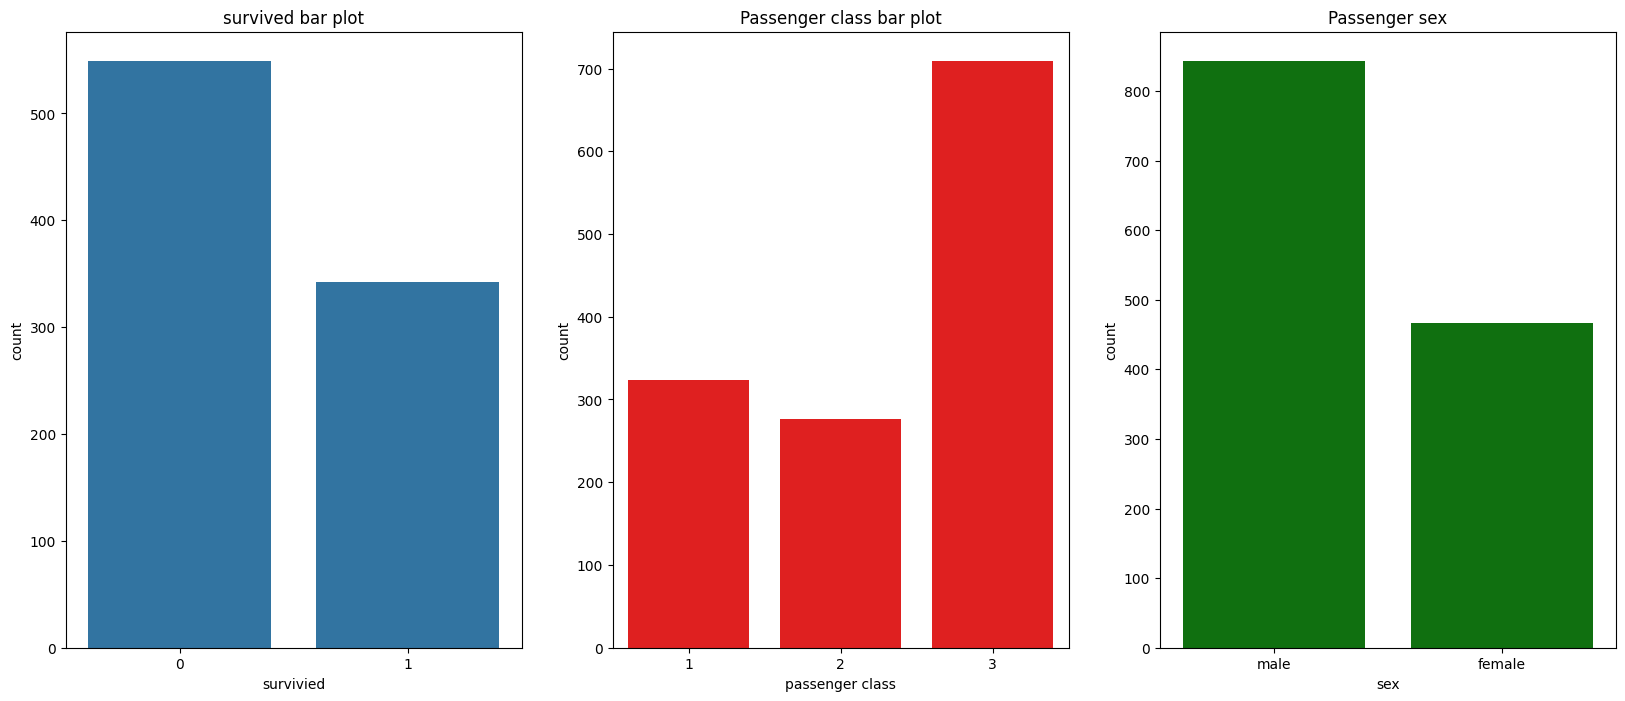

In [141]:
# plotting survived , Pclass and Sex variables in bar plots
plt.figure(figsize=(20,8))

# plotting survived variable
plt.subplot(1,3,1)
sns.countplot(x= train_df['Survived'].astype('O'))
plt.title('survived bar plot')
plt.xlabel('survivied')

# plotting Pclass variable
plt.subplot(1,3,2)
sns.countplot(x=df['Pclass'].astype('O') , color='Red')
plt.title('Passenger class bar plot')
plt.xlabel('passenger class')

# Plotting sex variable
plt.subplot(1,3,3)
sns.countplot(x=df['Sex'] , color='Green')
plt.title('Passenger sex')
plt.xlabel('sex')


- Most of the people didn't survive, in third class (the lowest class) or first class, and were male
- The second class was the least one in the count

In [142]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


Text(0.5, 0, 'Parents / Children')

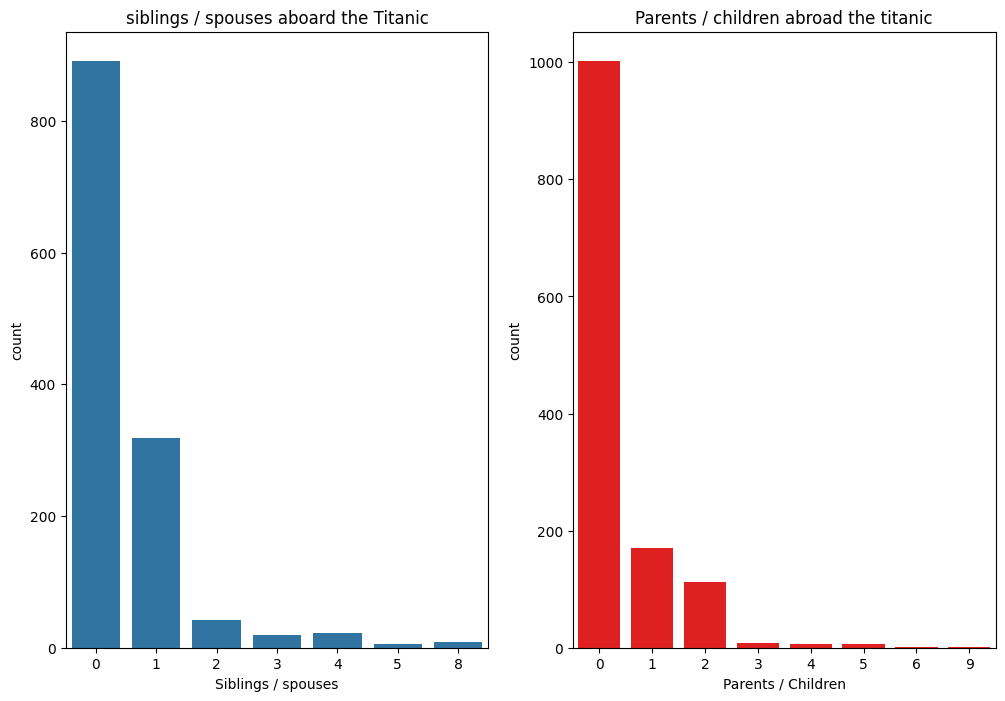

In [143]:
# plotting SibSp and Parch columns in bar plots
plt.figure(figsize=(12,8))

#plotting SibSp column
plt.subplot(1,2,1)
sns.countplot(x= df['SibSp'])
plt.title('siblings / spouses aboard the Titanic')
plt.xlabel('Siblings / spouses')

# plotting Prach
plt.subplot(1,2,2)
sns.countplot(x=df['Parch'] , color= 'red')
plt.title('Parents / children abroad the titanic')
plt.xlabel('Parents / Children')

In most cases are individuals or only one sibling / spouse / parent / child, or two siblings / spouses / parents / children

Text(0.5, 0, 'Fare($)')

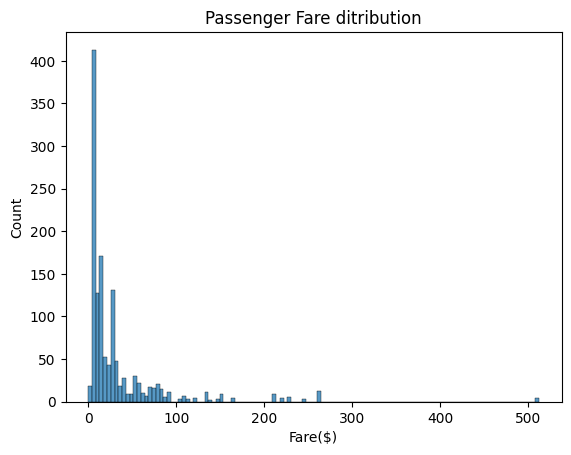

In [144]:
#Plotting fare ditribution
sns.histplot(df['Fare'])
plt.title('Passenger Fare ditribution')
plt.xlabel('Fare($)')

Ok I will make two plot the first plot is between 0 - 100 and the second one is above 100

Text(0.5, 0, 'Fare($)')

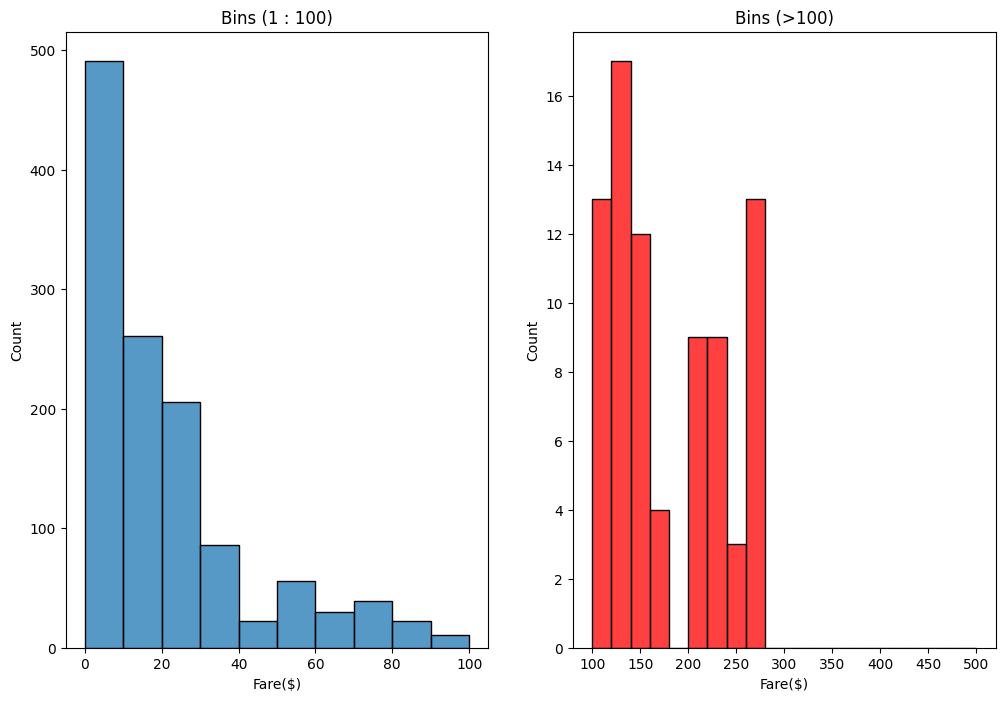

In [145]:
plt.figure(figsize=(12,8))
# Plotting the first plot
plt.subplot(1,2,1)
sns.histplot(df['Fare'], bins=np.arange(0,110 , 10))
plt.title('Bins (1 : 100)')
plt.xlabel('Fare($)')

# Plotting second one 
plt.subplot(1,2,2)
sns.histplot(df['Fare'] , bins = np.arange(100,520 , 20) , color='red')
plt.title('Bins (>100)')
plt.xlabel('Fare($)')

- mode is between 0 - 10 $
- median is between 10 - 20$
- mean is between 20 - 40$

> There are outilires so we should sperate or drop them

<Axes: ylabel='Fare'>

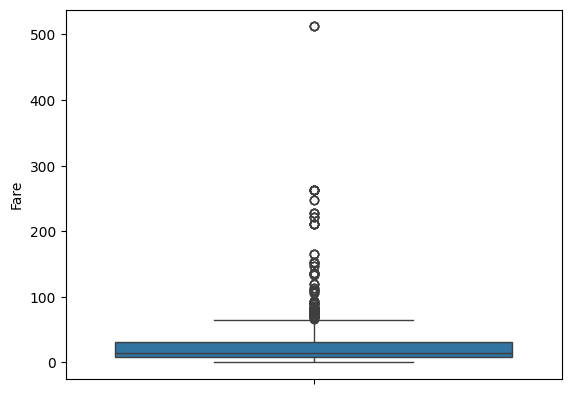

In [146]:
#Getting outlires

sns.boxplot(df['Fare']) 

There are many outlires so we should crop them

In [147]:
# Let's define what ticket codes say
df['Ticket'].value_counts()

Ticket
CA. 2343        11
1601             8
CA 2144          8
347082           7
S.O.C. 14879     7
                ..
A.5. 3236        1
347086           1
365237           1
334915           1
28666            1
Name: count, Length: 929, dtype: int64

Ticket column have many codes in the column values and these values not unique so I want to see values without characters

> There are duplicated tickets so I think they are shared tickets

In [148]:
only_numbers = df[df['Ticket'].str.match('[0-9]')]['Ticket']
only_numbers.unique()

array(['113803', '373450', '330877', '17463', '349909', '347742',
       '237736', '113783', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', '335677', '113789',
       '2677', '345764', '2651', '7546', '11668', '349253', '330958',
       '370371', '14311', '2662', '349237', '3101295', '2926', '113509',
       '19947', '2697', '2669', '113572', '36973', '347088', '2661',
       '3101281', '315151', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       '3101278', '343275', '343276', '347466', '364500', '374910',
       '231919', '244367', '349245', '349215', '35281', '7540', '3101276',
       '349207', '343120', '312991', '349249', '371110', '110465', '2665',
       '324669', '4136', '2627', '370369', '27267', '370372', '2668',
       '347061', '349241', '228414', '11752', '7534', '2678', '347081',
     

In [149]:
only_numbers.value_counts()

Ticket
1601       8
3101295    7
347077     7
347082     7
113781     6
          ..
348125     1
237670     1
2688       1
248726     1
113044     1
Name: count, Length: 705, dtype: int64

In [150]:
# See only characters
only_characters = df['Ticket'].replace('[0-9]' , '' , regex = True)
only_characters.unique()

array(['A/ ', 'PC ', 'STON/O. ', '', 'PP ', 'A/. ', 'C.A. ', 'A./. ',
       'SC/Paris ', 'S.C./A.. ', 'CA ', 'S.P. ', 'S.O.C. ', 'SO/C ',
       'W./C. ', 'SOTON/OQ ', 'W.E.P. ', 'STON/O . ', 'A. ', 'C ',
       'SOTON/O.Q. ', 'SC/PARIS ', 'S.O.P. ', 'A.. ', 'Fa ', 'CA. ',
       'LINE', 'F.C.C. ', 'W/C ', 'SW/PP ', 'SCO/W ', 'P/PP ', 'SC ',
       'SC/AH ', 'A/S ', 'SC/AH Basle ', 'WE/P ', 'S.W./PP ',
       'S.O./P.P. ', 'F.C. ', 'SOTON/O ', 'S.C./PARIS ', 'C.A./SOTON ',
       'SC/A. ', 'STON/OQ. ', 'SC/A ', 'AQ/ ', 'A. . ', 'LP ', 'AQ/. '],
      dtype=object)

In [151]:
only_characters.value_counts()

Ticket
                957
PC               92
C.A.             46
A/               18
SOTON/O.Q.       16
W./C.            14
STON/O .         14
A/.              13
CA.              12
SC/PARIS         11
CA               10
F.C.C.            9
SOTON/OQ          8
C                 8
S.O.C.            7
STON/O.           7
S.O./P.P.         7
SC/Paris          5
SC/AH             4
PP                4
LINE              4
SOTON/O           3
A./.              3
F.C.              3
S.C./PARIS        3
A..               3
SC                2
P/PP              2
WE/P              2
W.E.P.            2
S.P.              1
SO/C              1
S.C./A..          1
A.                1
SCO/W             1
SW/PP             1
W/C               1
Fa                1
S.O.P.            1
S.W./PP           1
A/S               1
SC/AH Basle       1
C.A./SOTON        1
SC/A.             1
STON/OQ.          1
SC/A              1
AQ/               1
A. .              1
LP                1
AQ/.         

In [152]:
only_characters[only_characters != ''] # There 230 entry have letters in them

0               A/ 
1               PC 
2          STON/O. 
10              PP 
12             A/. 
           ...     
1296      SC/PARIS 
1300    SOTON/O.Q. 
1304           A.. 
1305            PC 
1306    SOTON/O.Q. 
Name: Ticket, Length: 352, dtype: object

In [153]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,train
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,train
1165,1166,NaN,3,"Saade, Mr. Jean Nassr",male,NaN,0,0,2676,7.2250,NaN,C,test
455,456,1.0,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C,train
1070,1071,NaN,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C,test


I want to see there are difference between the Pclass value and first digit in the ticket using chi contingency


$$H_0: Pclass - FDT = 0$$
$$H_1: Pcalass - FDT \neq 0$$

In [154]:
from scipy.stats import chi2_contingency
import re
first_digit = df['Ticket'].str.extract(r'(\d)' , expand=False)

mask = first_digit.notna()
contingency_table = pd.crosstab(df.loc[mask , 'Pclass'] , first_digit[mask])

In [155]:
contingency_table

Ticket,1,2,3,4,5,6,7,8,9
Pclass,,,,,,,,,
1,288,8,18,0,5,4,0,0,0
2,32,204,38,0,1,0,2,0,0
3,17,149,436,30,31,17,18,2,5


In [156]:
chi2 , pval , dof , excepted = chi2_contingency(contingency_table)

In [157]:
round(pval , 4)

np.float64(0.0)

We reject null, so there are statistically significant relationship between them, so there aren't any defference bewtween them

After reading some discussions I think we can make new features like:
- FirstDigitTicket ---> We ensure that Pclass and First Digit in ticket number are the same
- TicketPrefix ---> Becuase it may refer to booking route/agent, shared cabins/groups
- TicketNumberDigits ---> It may refer to Batch/timeframe when ticket issued 
- SharedTicketNumbers ---> It may refer to groups or Families traveling together
> I will drop raw ticket data

In [158]:
# Take a look on cabin values
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [159]:
mask = df['Name'].str.contains(r'\((.*?)\)')
brackets_name = df.loc[mask]
brackets_name.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,train
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,train
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,train


In [160]:
brackets_name['Sex'].value_counts()

Sex
female    201
male       20
Name: count, dtype: int64

Ok most of Names have brackets is females, so it may refer to madian name or their real name before marriage

In [161]:
# Showing male names with brackets
male_brackets_name = brackets_name.query('`Sex` == "male"')['Name']
male_brackets_name

101                      Petroff, Mr. Pastcho ("Pentcho")
146          Andersson, Mr. August Edvard ("Wennerstrom")
148              Navratil, Mr. Michel ("Louis M Hoffman")
187         Romaine, Mr. Charles Hallace ("Mr C Rolmane")
227                       Lovell, Mr. John Hall ("Henry")
429                    Pickard, Mr. Berk (Berk Trembisky)
507         Bradley, Mr. George ("George Arthur Brayton")
553                     Leeni, Mr. Fahim ("Philip Zenni")
572                      Flynn, Mr. John Irwin ("Irving")
599          Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
604                       Homer, Mr. Harry ("Mr E Haven")
705        Morley, Mr. Henry Samuel ("Mr Henry Marshall")
709     Moubarek, Master. Halim Gonios ("William George")
785                    Harmer, Mr. Abraham (David Lishin)
926      Katavelas, Mr. Vassilios (Catavelas Vassilios")"
999                      Willer, Mr. Aaron (Abi Weller")"
1035    Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...
1177          

Ok I want to see if these names in our data or not

In [162]:
male_names = male_brackets_name.str.extract('\((.*?)\)')[0].str.replace('"' , '').str.strip().to_list()

In [163]:
df.query('Name in @male_names')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind


Ok All of these names aren't in our data, so I think these nicknames of Them


> So in feature Enigneering I will sperate name to three columns (family name , nickname/maiden name, Title)

> Nickname for males , maiden name for females and I will get family name from females that have brackets becuase the first name is their husbonds family name

In [164]:
# See importance of these males if they are important, I will keep them. Otherwise I will drop them

df.query('`Name` in @male_brackets_name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
101,102,0.0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,train
146,147,1.0,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,train
148,149,0.0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S,train
187,188,1.0,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S,train
227,228,0.0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S,train
429,430,1.0,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,train
507,508,1.0,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,train
553,554,1.0,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C,train
572,573,1.0,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S,train
599,600,1.0,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,train


I want to see If these values are from outlires or not

In [165]:

# Splitting outlires values and non ones
Q1_F = df['Fare'].quantile(0.25) # Q1 of Fare column
Q3_F = df['Fare'].quantile(0.75) # Q3 of Fare column
IQR = Q3_F - Q1_F

outlires = df[
    (df['Fare'] > (IQR * 1.5 + Q3_F)) | 
    (df['Fare'] < (IQR * 1.5 - Q1_F))
]

outlires

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [166]:
df.query('`Name` in @male_brackets_name').index.isin(outlires.index).sum()

np.int64(19)

90% of them are outlires so I will drop all of them in data cleaing

In [167]:
# Getting value counts of family names
df['Name'].str.split(',').str[0].str.strip().value_counts()

Name
Andersson    11
Sage         11
Asplund       8
Goodwin       8
Davies        7
             ..
Beesley       1
Sloper        1
Emir          1
Hipkins       1
Wheeler       1
Name: count, Length: 875, dtype: int64

There are people from the same family, so I make column called family name